# PCA - `Decathlon` Dataset graphs

In [1]:
#disable warnings
from warnings import simplefilter, filterwarnings
simplefilter(action='ignore', category=FutureWarning)
filterwarnings("ignore")

In [2]:
from scientisttools.datasets import decathlon
from scientisttools import PCA
#instanciation
res_pca = PCA(ind_sup=(41,42,43,44,45), sup_var= (10,11,12),rotate=None)
res_pca.fit(decathlon)

PCA(ind_sup=(41, 42, 43, 44, 45), rotate=None, sup_var=(10, 11, 12))

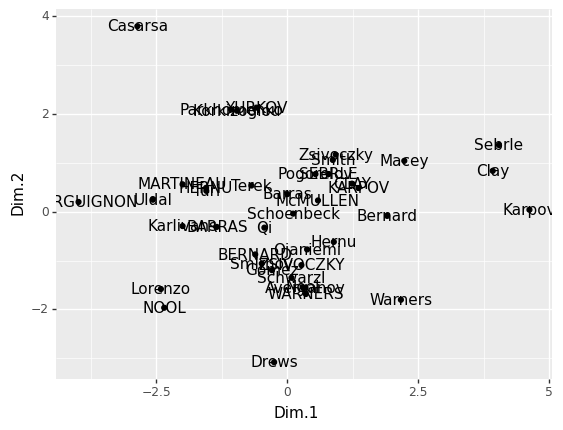

In [5]:
#
from pandas import concat
from plotnine import ggplot, aes, geom_point, geom_text
coord = concat((res_pca.ind_.coord,res_pca.call_.Xtot),axis=1).drop(index=res_pca.call_.ind_sup)

p = (
    ggplot(coord,aes(x="Dim.1",y="Dim.2",label=coord.index))
    + geom_point()
    + geom_text(aes(fill="Dim.3"))
)
print(p)

## Eigenvalues

### Absolute

In [4]:
from scientisttools import fviz_screeplot
p = fviz_screeplot(res_pca,element="eigenvalue",add_labels=True)
print(p)

ImportError: cannot import name 'fviz_screeplot' from 'scientisttools' (d:\Bureau\PythonProject\packages\scientisttools\scientisttools\__init__.py)

### Propoirtion

In [ ]:
# Proportion
p = fviz_screeplot(res_pca,element="proportion",add_labels=True)
print(p)

### Cumulative

In [ ]:
# Cumulative
p = fviz_screeplot(res_pca,element="cumulative",add_labels=True)
print(p)

## Individuals Factor Map

### Colors bu RGB colors

#### Only active individuals

In [ ]:
from scientisttools import fviz_pca_ind
p = fviz_pca_ind(res_pca,repel=True)
print(p)

#### With supplementary elements (individuals and categories)

In [ ]:
#with supplementary elements (indviduals & categories)
print(fviz_pca_ind(res_pca,repel=True,ind_sup=True,quali_sup=True))

### Color by cos2

In [ ]:
p = fviz_pca_ind(res_pca,col_ind="cos2",repel=True)
print(p)

In [ ]:
from scientisttools import fviz_corrplot
p = fviz_corrplot(res_pca.ind_.cos2,x_label="Individuals",legend_title="Cos2",title="Individuals Cos2")
print(p)

In [ ]:
from scientisttools import fviz_cos2
p = fviz_cos2(res_pca,element="ind",axis=0)
print(p)

### Color by contrib

In [ ]:
p = fviz_pca_ind(res_pca,col_ind="contrib",repel=True)
print(p)

In [ ]:
p = fviz_corrplot(res_pca.ind_.contrib,x_label="Individuals",legend_title="Contrib",title="Individuals Contributions")
print(p)

In [ ]:
from scientisttools import fviz_contrib
p = fviz_contrib(res_pca,element="ind",axis=0)
print(p)

### Color by coord

In [ ]:
p = fviz_pca_ind(res_pca,col_ind="coord",repel=True)
print(p)

### Color by quantitative columns

In [ ]:
p = fviz_pca_ind(res_pca,col_ind=decathlon.columns[0],repel=True)
print(p)

### Color by qualitatives columns

In [ ]:
p = fviz_pca_ind(res_pca,habillage=decathlon.columns[-1],palette=("blue","red"),repel=True)
print(p)

In [ ]:
p = fviz_pca_ind(res_pca,habillage=decathlon.columns[-1],palette=("blue","red"),add_ellipses=True,ellipse_type="euclid",ellipse_alpha=1,repel=True)
print(p)

### Color by numpy array

In [ ]:
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_pca.call_.X.shape[0])
p = fviz_pca_ind(res_pca,col_ind=color_numpy,repel=True)
print(p)

### Color by kmeans clustering

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=np.random.seed(123), n_init="auto").fit(res_pca.ind_.coord)
p = fviz_pca_ind(res_pca,col_ind=kmeans,repel=True)
print(p)

### Set limits

#### Limit with cos2

In [ ]:
p = fviz_pca_ind(res_pca,lim_cos2=0.8,repel=True)
print(p)

#### Limit with contrib

In [ ]:
p = fviz_pca_ind(res_pca,lim_contrib=10,repel=True)
print(p)

## Variables Factor Map

### Color by RGB

#### Only active variables

In [ ]:
from scientisttools import fviz_pca_var, fviz_corrplot
p = fviz_pca_var(res_pca,repel=True)
print(p)

In [ ]:
#with supplementary variables
print(fviz_pca_var(res_pca,quanti_sup=True,repel=True))

### Color by cos2

In [ ]:
p = fviz_pca_var(res_pca,col_var="cos2",repel=True)
print(p)

In [ ]:
print(fviz_corrplot(res_pca.var_.cos2,x_label="Variables",title="Variables Cos2",legend_title="Cos2"))

In [ ]:
print(fviz_cos2(res_pca,element="var"))

## Color by `contrib`

In [ ]:
p = fviz_pca_var(res_pca,col_var="contrib",repel=True)
print(p)

In [ ]:
print(fviz_corrplot(res_pca.var_.contrib,x_label="Variables",title="Variables Contributions",legend_title="Contrib"))

In [ ]:
print(fviz_contrib(res_pca,element="var"))

### Color by coordinates

In [ ]:
p = fviz_pca_var(res_pca,col_var="coord",repel=True)
print(p)

### Color by numpy array

In [ ]:
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_pca.call_.X.shape[1])
print(fviz_pca_var(res_pca,col_var=color_numpy,repel=True))

### Color by kmeans clustering

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=np.random.seed(123), n_init="auto").fit(res_pca.var_.coord)
print(fviz_pca_var(res_pca,col_var=kmeans,repel=True))

### Set limits

#### Limit with cos2

In [ ]:
p = fviz_pca_var(res_pca,lim_cos2=0.6,repel=True)
print(p)

#### Limit with contrib

In [ ]:
p = fviz_pca_var(res_pca,lim_contrib=20,repel=True)
print(p)

##### Using fviz_corrcircle

In [ ]:
from scientisttools import fviz_corrcircle
p = fviz_corrcircle(res_pca,repel=True)
print(p)

## Biplot

In [ ]:
from scientisttools import fviz_pca_biplot
p = fviz_pca_biplot(res_pca,repel_ind=True,repel_var=True)
print(p)

In [ ]:
p = fviz_pca_biplot(res_pca,habillage="Competition",repel_ind=True,repel_var=True)
print(p)